In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('../input/anual-salary-reports-survey/salary_data.csv',sep=';')
dataset=pd.DataFrame(dataset)
dataset=dataset.drop('gender',axis=1)
dataset=dataset.drop('ID',axis=1)
# dataset['gender'].replace([0,1],{'F','M'},inplace=True)
df_train=dataset.sample(frac=0.9,random_state=0)
df_test=dataset.drop(df_train.index)
display(df_train.head(5))
display(df_train.shape)

,income,age,education_level
3582,57968.043869,59,3.0
60498,37335.842103,33,2.0
53227,39173.684957,35,2.0
21333,47959.729368,19,2.0
3885,57611.690525,44,2.0


(90000, 3)

In [3]:
def NormalizeData(data):
    return (data-np.min(data))/(np.max(data)-np.min(data))

In [4]:
df_train=NormalizeData(df_train)
df_test=NormalizeData(df_test)

In [5]:
x_train=df_train.drop('income',axis=1)
x_test=df_test.drop('income',axis=1)
y_train=df_train['income']
y_test=df_test['income']

In [6]:
from tensorflow import keras
from tensorflow.keras import layers 

model=keras.Sequential(
    [
        layers.Dense(2,activation='relu',input_shape=[2]),
        layers.Dense(2,activation='relu'),
        layers.Dense(1)
    ]
)

model.compile(
    optimizer='adam',
    loss='mae',
)

2022-10-06 14:35:43.823147: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
history=model.fit(
    x_train,y_train,validation_data=(x_test,y_test), batch_size=100, epochs=100,
)

2022-10-06 14:35:44.183691: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
900/900 [==============================] - 2s 2ms/step - loss: 0.0482 - val_loss: 0.0527
Epoch 2/100
900/900 [==============================] - 2s 2ms/step - loss: 0.0458 - val_loss: 0.0504
Epoch 3/100
900/900 [==============================] - 2s 2ms/step - loss: 0.0458 - val_loss: 0.0492
Epoch 4/100
900/900 [==============================] - 2s 2ms/step - loss: 0.0458 - val_loss: 0.0534
Epoch 5/100
900/900 [==============================] - 2s 2ms/step - loss: 0.0458 - val_loss: 0.0483
Epoch 6/100
900/900 [==============================] - 2s 2ms/step - loss: 0.0458 - val_loss: 0.0478
Epoch 7/100
900/900 [==============================] - 2s 2ms/step - loss: 0.0458 - val_loss: 0.0500
Epoch 8/100
900/900 [==============================] - 2s 2ms/step - loss: 0.0458 - val_loss: 0.0524
Epoch 9/100
900/900 [==============================] - 2s 2ms/step - loss: 0.0458 - val_loss: 0.0485
Epoch 10/100
900/900 [==============================] - 2s 2ms/step - loss: 0.0458 - val_lo

<AxesSubplot:>

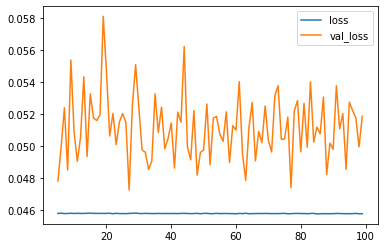

In [8]:
hdf=pd.DataFrame(history.history)
hdf.loc[5:,['loss','val_loss']].plot()

In [9]:
print("Min validation loss: {}".format(hdf['val_loss'].min()))

Min validation loss: 0.04725540801882744
